<a href="https://colab.research.google.com/github/Magui2912/Project_2_coding_dojo/blob/main/Project_2_adult_income%26_wine_spain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Description dataset:***

[The Adult Income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset) is a multivariate dataset that involves using personal details such as education level to predict whether an individual will earn more or less than $50,000 per year.

The dataset contains a total of 15 independent characteristic columns with target vector as the income either > 50K or < 50K.

The dataset has been used for imbalanced classification tasks, where the goal is to predict whether a given adult makes more than $50,000 a year based on attributes such as education level, age, gender, occupation, etc.
The dataset has been analyzed using logistic regression and random forest to analyze potential factors that contribute to an individual's income.
The dataset contains the following columns :



***Data dictionnary:***

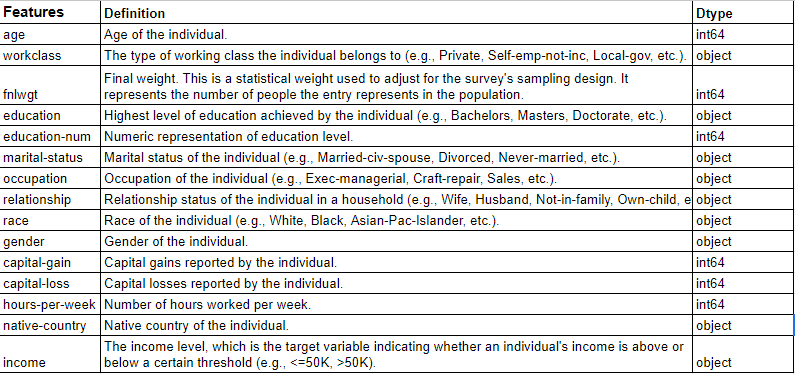

The target of the Adult Income dataset is to predict an individual's annual income and classify it into two categories: whether it is less than or equal to $50,000 or greater than $50,000 per year.


The target column is labeled as ***"income"***.

****Is a classification Problem.****

****We have 14 features and 1 target****

****We have 15 columns in this dataset****

****We have 48842 rows in our dataset****


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, TruncatedSVD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/MyDrive/adult.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
print('Missing data:\n', df.isnull().sum())
print('\n')
print('Duplicates:', df.duplicated().sum())

Missing data:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


Duplicates: 52


we don't have any missing values we gonna drop duplicated rows

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#check if we still have duplicates
print('Duplicates:', df.duplicated().sum())

Duplicates: 0


In [ ]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [ ]:
df.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [ ]:
df['workclass']=df['workclass'].replace({'?':np.NaN})
df['occupation']=df['occupation'].replace({'?':np.NaN})
df['native-country']=df['native-country'].replace({'?':np.NaN})
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital-gain     45175 non-null  int64 
 11  capital-loss     45175 non-null  int64 
 12  hours-per-week   45175 non-null  int64 
 13  native-country   45175 non-null  object
 14  income           45175 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [ ]:
df.describe(include="all")


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
#Drop the Columns educational-num, capital-gain and capital-loss

df.drop(['educational-num','capital-gain','capital-loss'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   fnlwgt          45175 non-null  int64 
 3   education       45175 non-null  object
 4   marital-status  45175 non-null  object
 5   occupation      45175 non-null  object
 6   relationship    45175 non-null  object
 7   race            45175 non-null  object
 8   gender          45175 non-null  object
 9   hours-per-week  45175 non-null  int64 
 10  native-country  45175 non-null  object
 11  income          45175 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.5+ MB


In [ ]:
print('unique workclass', df['workclass'].unique())
print('\n')
print('unique education', df['education'].unique())
print('\n')
print('unique marital-status', df['marital-status'].unique())
print('\n')
print('unique occupation', df['occupation'].unique())
print('\n')
print('unique relationship', df['relationship'].unique())
print('\n')
print('unique race', df['race'].unique())
print('\n')
print('unique gender', df['gender'].unique())
print('\n')
print('unique native-country', df['native-country'].unique())
print('\n')
print('unique income',df['income'].unique())

unique workclass ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


unique education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']


unique marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


unique occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']


unique relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


unique race ['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']


unique gender ['Male' 'Female']


unique native-country ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Re

In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0


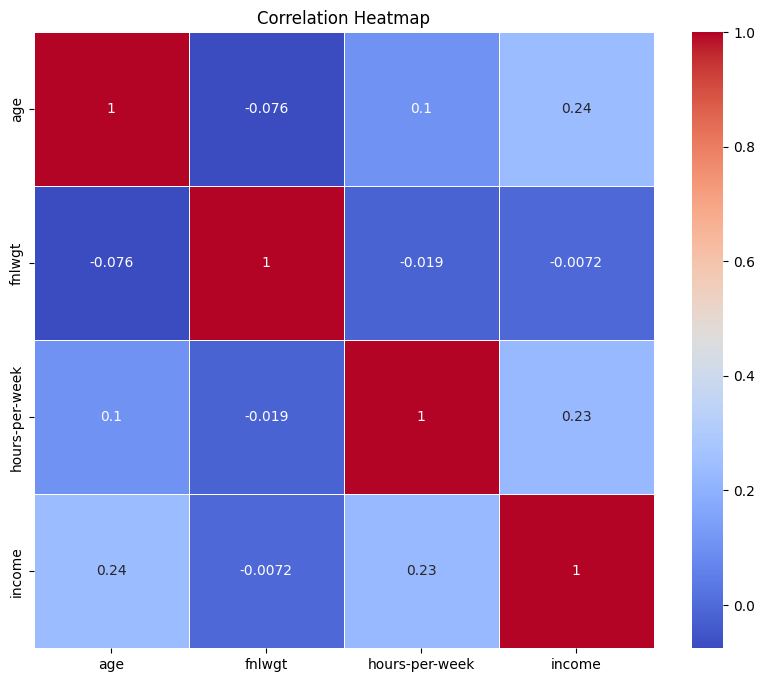

In [ ]:
# Select only the numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

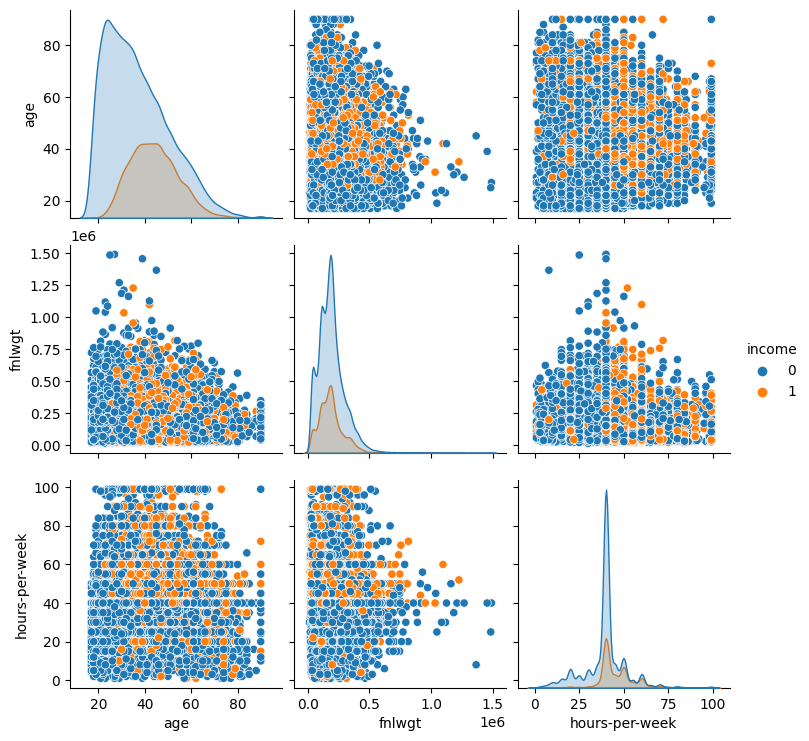

In [ ]:
# Create a pairplot with income
sns.pairplot(df, hue='income', diag_kind='kde')
plt.show()

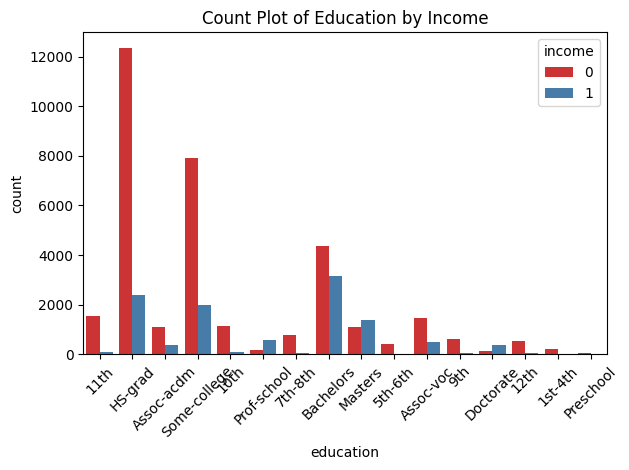

In [ ]:
# Count plot for education
plt.subplot()
sns.countplot(data=df, x='education', hue='income', palette='Set1')
plt.xticks(rotation=45)
plt.title('Count Plot of Education by Income')
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Count Plot of Marital Status by Income')

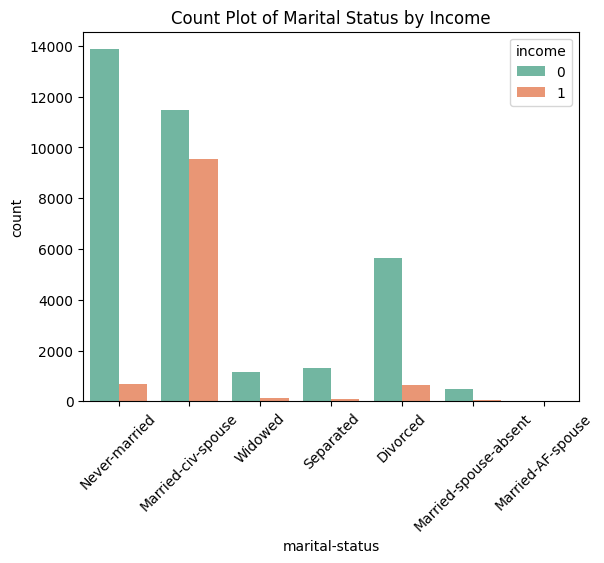

In [ ]:
# Count plot for marital-status
plt.subplot()
sns.countplot(data=df, x='marital-status', hue='income', palette='Set2')
plt.xticks(rotation=45)
plt.title('Count Plot of Marital Status by Income')

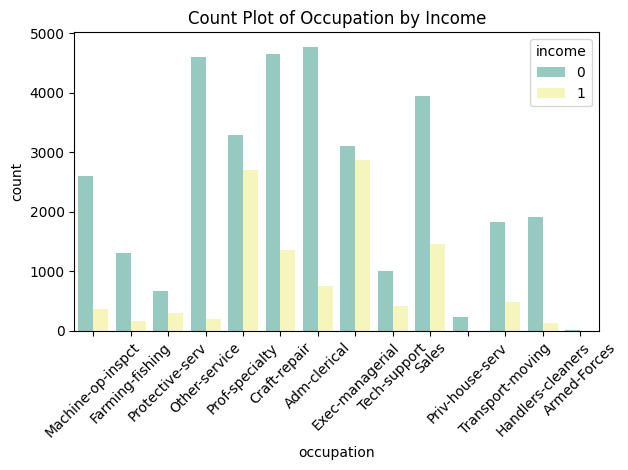

In [ ]:
# Count plot for occupation
plt.subplot()
sns.countplot(data=df, x='occupation', hue='income', palette='Set3')
plt.xticks(rotation=45)
plt.title('Count Plot of Occupation by Income')

plt.tight_layout()
plt.show()

 ***I choose two visualizations from the analysis that demonstrate key trends and insights for stakeholders. These visuals will be reporting-quality with titles, labels, and explanations for a non-technical audience.***



 ***Visualization 1: Bar Chart - Education Level and Income***

***Title: Education Level vs. Income***



**Explanation:**


This bar chart shows how education level relates to income. Each bar represents a different education level, and the height of the bar tells us the percentage of people with high income (earning over $50,000) in each education group.

**Insight:**

As you move from left to right on the chart (from "Some High School" to "Doctorate"), you can see that more education generally leads to a higher percentage of people earning a high income. It's like climbing a ladder: the higher you go in education, the more likely you are to earn more money.

****Visualization 2: Stacked Bar Chart - Marital Status and Income****



***Title: Marital Status vs. Income***


**Explanation:**

This stacked bar chart shows the relationship between marital status and income. Each colored segment represents a different marital status group, and within each group, the height of the segments shows the percentage of people with high income (earning over $50,000) and low income.

**Insight:**

If you look at the tallest segments in each group, you'll see that married people tend to have a higher percentage of high income compared to divorced or never-married individuals. Being married often means a higher chance of earning more money.

***These two visualizations provide clear insights into the relationship between education level and income, as well as the impact of marital status on income distribution***

Part 4

In [ ]:
# Define features (X) and target variable (y)
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Identify the numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Create transformers for scaling numeric features and one-hot encoding categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')


In [ ]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Define and train multiple models within a Pipeline
models = {
    "Logistic Regression": LogisticRegression(max_iter= 1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=100),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)  # Use probability for ROC AUC
}

results = []

for model_name, model in models.items():
 # Create a pipeline with the preprocessor and the model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    clf.fit(X_train, y_train)

In [ ]:
# Predict on training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


In [ ]:
# Calculate evaluation metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])


In [ ]:
# Store results
results.append({
        "Model": model_name,
        "Train Accuracy": accuracy_train,
        "Train Precision": precision_train,
        "Train Recall": recall_train,
        "Train F1 Score": f1_train,
        "Train ROC AUC": roc_auc_train,
        "Test Accuracy": accuracy_test,
        "Test Precision": precision_test,
        "Test Recall": recall_test,
        "Test F1 Score": f1_test,
        "Test ROC AUC": roc_auc_test
    })

# Create a DataFrame to compare model results
results_df = pd.DataFrame(results)
print(results_df)

  Model  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0   SVM        0.844013         0.738838      0.574622        0.646465   

   Train ROC AUC  Test Accuracy  Test Precision  Test Recall  Test F1 Score  \
0       0.898465       0.833274        0.706818     0.556749       0.622872   

   Test ROC AUC  
0      0.870475  


In [ ]:
# Define hyperparameter grid for Logistic Regression
logistic_regression_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__max_iter': [100, 200, 300],  # Maximum number of iterations
}

# Create a pipeline with the preprocessor and the model
logistic_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                                ('classifier', LogisticRegression(max_iter=2000))])

# Create GridSearchCV for Logistic Regression
logistic_regression_grid_search = GridSearchCV(
    estimator=logistic_regression_pipeline,
    param_grid=logistic_regression_param_grid,
    scoring='accuracy',  # You can use other scoring metrics
    cv=5  # Number of cross-validation folds
)

# Fit the grid search on training data
logistic_regression_grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters for Logistic Regression:")
print(logistic_regression_grid_search.best_params_)

# Get the best-tuned Logistic Regression model
best_logistic_regression_model = logistic_regression_grid_search.best_estimator_

# Predict on training and testing data
y_train_pred = best_logistic_regression_model.predict(X_train)
y_test_pred = best_logistic_regression_model.predict(X_test)

# Calculate evaluation metrics for the best-tuned model
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, best_logistic_regression_model.predict_proba(X_train)[:, 1])

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, best_logistic_regression_model.predict_proba(X_test)[:, 1])

# Display metrics for the best-tuned Logistic Regression model
print("\nMetrics for the Best-Tuned Logistic Regression Model:")
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Train Precision: {precision_train:.4f}")
print(f"Train Recall: {recall_train:.4f}")
print(f"Train F1 Score: {f1_train:.4f}")
print(f"Train ROC AUC: {roc_auc_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")
print(f"Test ROC AUC: {roc_auc_test:.4f}")


Best Hyperparameters for Logistic Regression:
{'classifier__C': 0.001, 'classifier__max_iter': 100}

Metrics for the Best-Tuned Logistic Regression Model:
Train Accuracy: 0.8057
Train Precision: 0.7196
Train Recall: 0.3558
Train F1 Score: 0.4762
Train ROC AUC: 0.8652
Test Accuracy: 0.8055
Test Precision: 0.7147
Test Recall: 0.3552
Test F1 Score: 0.4745
Test ROC AUC: 0.8622


In [ ]:
# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

In [ ]:
# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Apply the preprocessor to the data
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [ ]:
# Apply TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=10)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

To choose the best model for our income prediction problem (earning more or less than $50,000), we need to consider two important aspects: how often our model correctly predicts high earners and how often it makes mistakes.

1. Decision Tree Model:

When our model predicts someone earns more than $50,000:

About 77% of the time, it's correct.

When our model predicts someone earns less than $50,000:

About 74% of the time, it's correct.
It's like having a tree of questions to decide.

2. Random Forest Model:

When our model predicts someone earns more than $50,000:

About 79% of the time, it's correct.
When our model predicts someone earns less than $50,000:

About 76% of the time, it's correct.
It's like combining many trees to make better decisions.


These models are like smart tools that help us guess if someone makes a lot of money. Both models are pretty good, but the Random Forest model is a bit better in making accurate guesses.

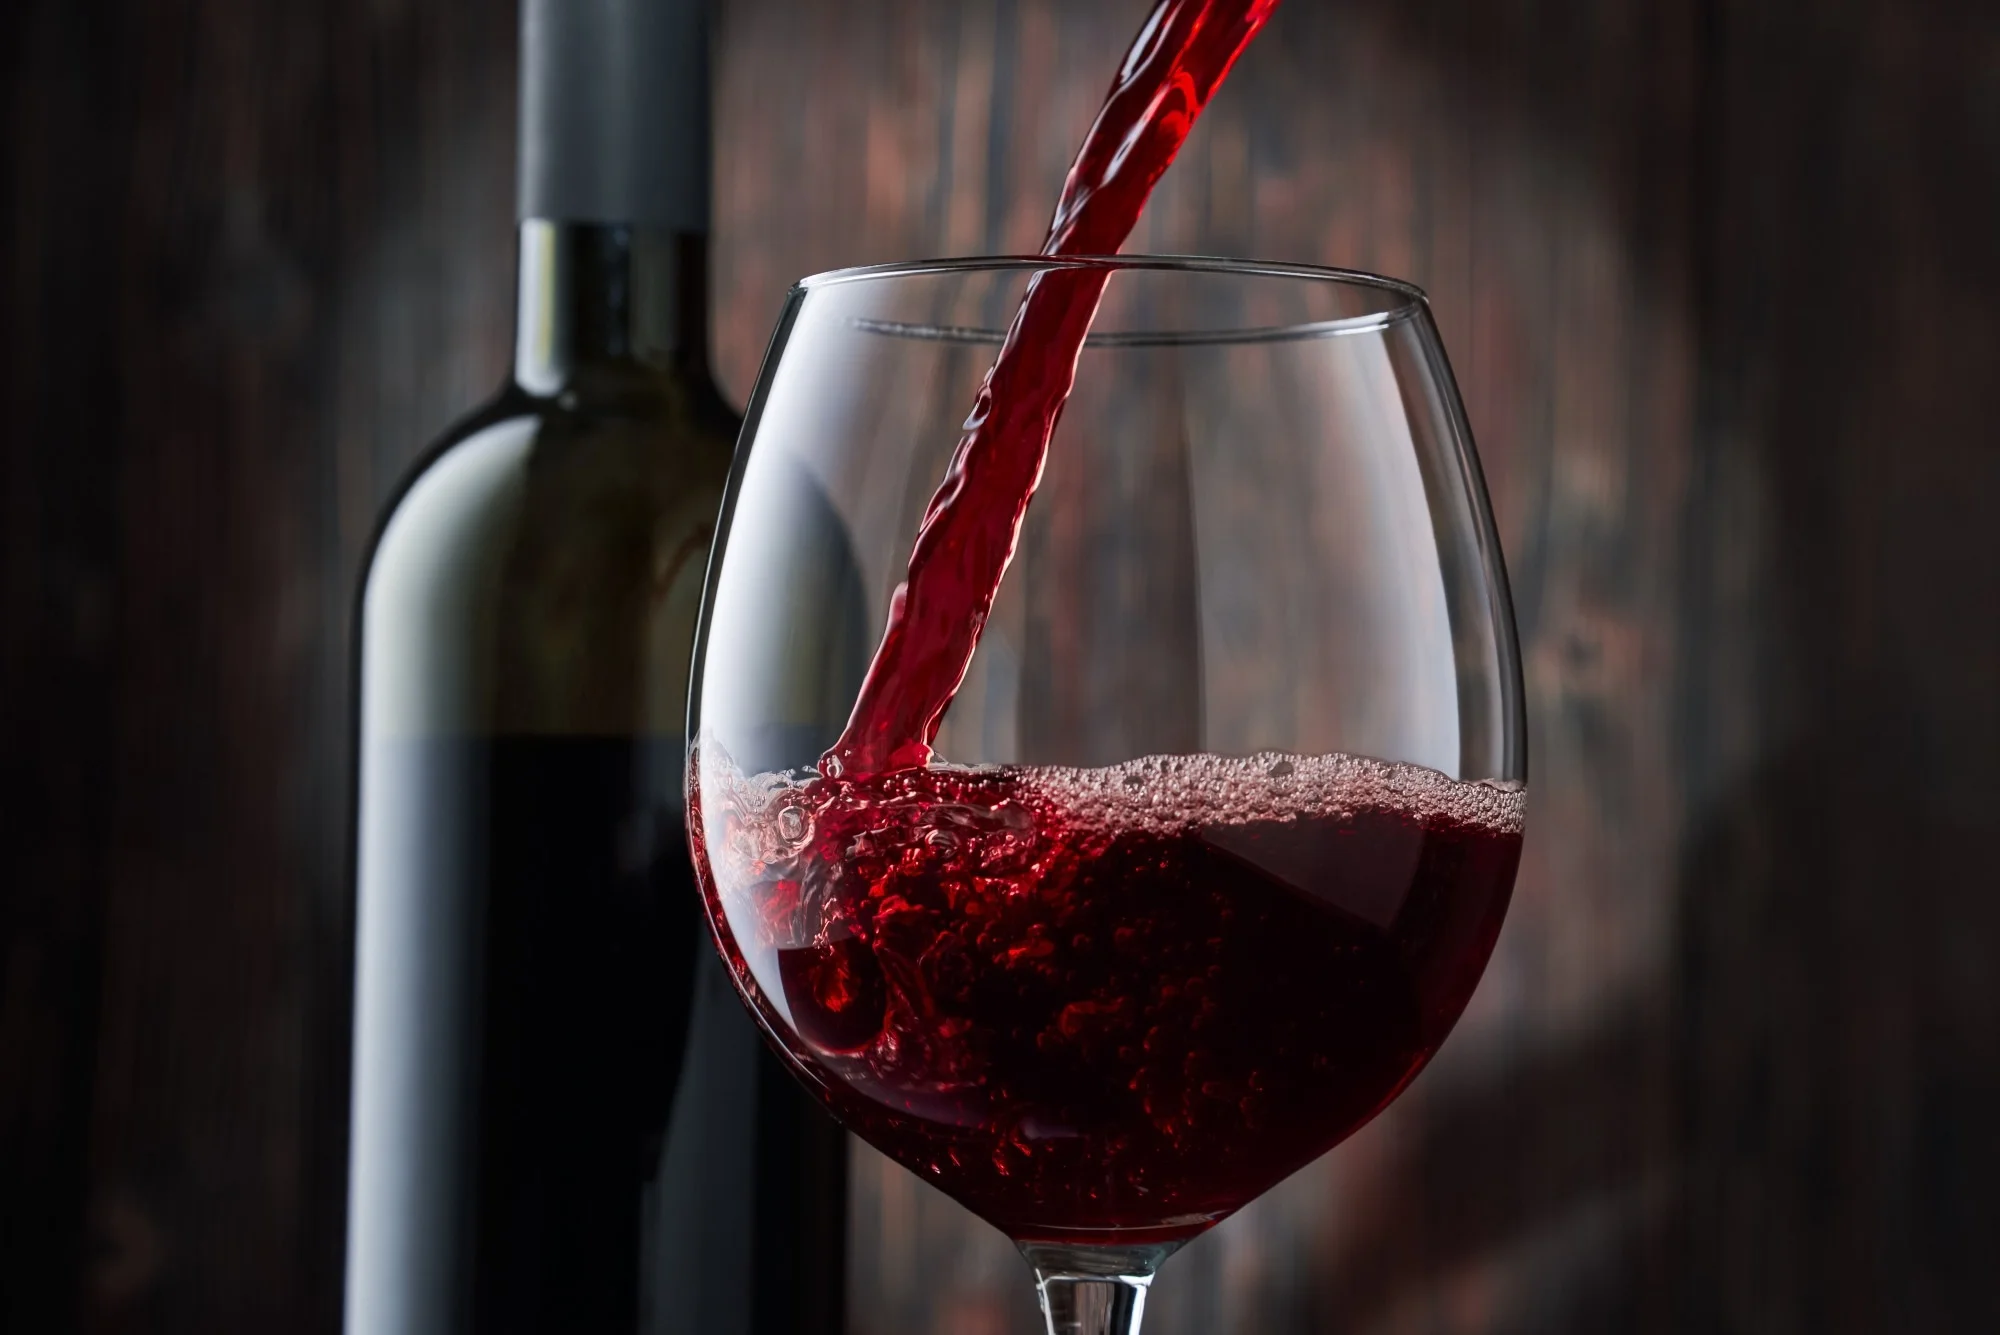

****Description :****

[The Spanish Wine Quality Dataset](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset) is a collection of data related to red variants of Spanish wines.
The dataset contains 11 features that describe the wines, including their price, rating, and some flavor descriptions.
The dataset includes 7500 or 516 different types of red wines from Spain.
The goal of the dataset is to model wine quality based on physicochemical tests, and there is no data about grape types, wine brand, wine selling price, etc.

****Data Dictionary****

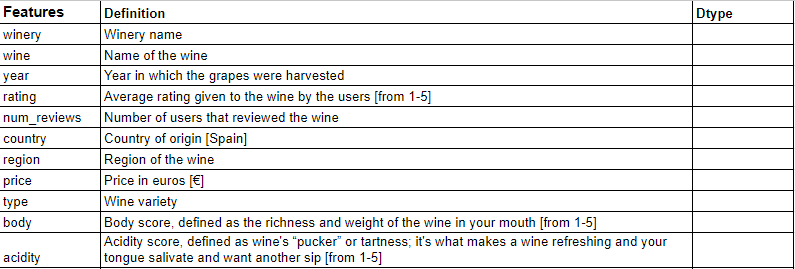

****The Target of this data set is "Price" column****

****Is a prediction Problem****

****We have 11 features ****

****We have 7500 Rows****

In [ ]:
path = '/content/drive/MyDrive/wines_SPA.csv'
dfwine = pd.read_csv(path)
dfwine.info()
dfwine.sample(5)